# Heart Disease Machine Learning Analysis

In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn import svm, neural_network
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [2]:
heart_df = pd.read_csv('heart.csv')

In [3]:
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [26]:
X=heart_df.drop('target',axis=1) 
y=heart_df['target']
X.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle = True)

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

folds=5
seed=42


clf_svm = svm.SVC(random_state=seed, probability=True)
clf_nn = neural_network.MLPClassifier(random_state=seed)

clf_xgb = xgb.XGBClassifier(seed=seed)
clf_knn = KNeighborsClassifier()

clf_dt = DecisionTreeClassifier(random_state=seed)

models = {
           'DecisionTree': clf_dt,
           'SVM': clf_svm, 
           'XGBoost': clf_xgb,
           'NeuralNet': clf_nn, 
           'KNN': clf_knn
         }

In [29]:
for modelname, model in models.items():
   score = cross_val_score(model, X_train, Y_train, cv=folds)
   print(modelname + ' cv_score: ' + str(score.mean()))

DecisionTree cv_score: 0.7593576965669989
SVM cv_score: 0.5472868217054263
XGBoost cv_score: 0.8016611295681063
NeuralNet cv_score: 0.4903654485049834
KNN cv_score: 0.6600221483942414


In [32]:
model_results = pd.DataFrame()

for modelname, model in models.items():
   start_time = time.time()
   model.fit(X_train, Y_train)
   print(modelname + "walltime: ")
   walltime = (time.time() - start_time) * 1000
   print(str(walltime) + " ms")
   m_pred = model.predict(X_test)
   model_results[modelname] = m_pred
   print(modelname + ' test_score:' + str(metrics.accuracy_score(Y_test, m_pred)))

DecisionTreewalltime: 
2.1827220916748047 ms
DecisionTree test_score:0.7362637362637363
SVMwalltime: 
14.030694961547852 ms
SVM test_score:0.5604395604395604
XGBoostwalltime: 
15.026569366455078 ms
XGBoost test_score:0.8461538461538461
NeuralNetwalltime: 
7.4520111083984375 ms
NeuralNet test_score:0.5824175824175825
KNNwalltime: 
0.9200572967529297 ms
KNN test_score:0.6593406593406593


In [9]:
from sklearn.model_selection import learning_curve

def plot_learning_curves(title, train_sizes, train_scores, valid_scores, ylim=None):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()
    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training Score")
    plt.plot(train_sizes, np.mean(valid_scores, axis=1), 'o-', color="g", label="Cross-Valid Score")
    plt.legend(loc="best")
    plt.show()

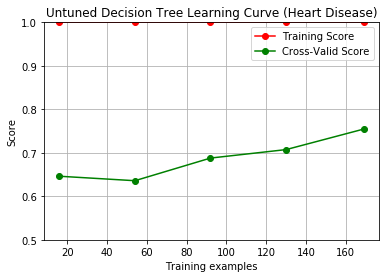

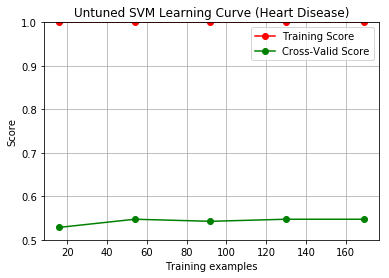

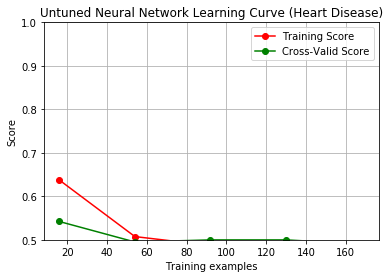

C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\labe

C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\labe

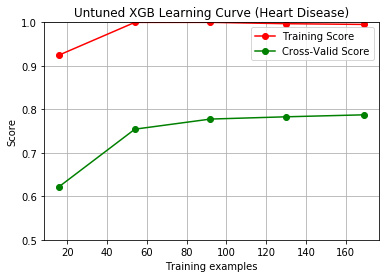

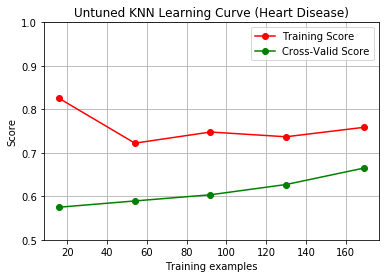

In [10]:
dt_sizes, dt_train_scores, dt_valid_scores = learning_curve(clf_dt, X_train, Y_train, train_sizes=np.linspace(0.1, 1.0, 5.0, 10.0), cv=folds)
plot_learning_curves('Untuned Decision Tree Learning Curve (Heart Disease)', dt_sizes, dt_train_scores, dt_valid_scores, (.50, 1.0))

svm_sizes, svm_train_scores, svm_valid_scores = learning_curve(clf_svm, X_train, Y_train, train_sizes=np.linspace(0.1, 1.0, 5.0, 10.0), cv=folds)
plot_learning_curves('Untuned SVM Learning Curve (Heart Disease)', svm_sizes, svm_train_scores, svm_valid_scores, (.50, 1.0))

nn_sizes, nn_train_scores, nn_valid_scores = learning_curve(clf_nn, X_train, Y_train, train_sizes=np.linspace(0.1,1.0,5.0,10.0), cv=folds)
plot_learning_curves('Untuned Neural Network Learning Curve (Heart Disease)', nn_sizes, nn_train_scores, nn_valid_scores, (.5, 1.0))

xgb_sizes, xgb_train_scores, xgb_valid_scores = learning_curve(clf_xgb, X_train, Y_train, train_sizes=np.linspace(0.1,1.0,5.0,10.0), cv=folds)
plot_learning_curves('Untuned XGB Learning Curve (Heart Disease)', xgb_sizes, xgb_train_scores, xgb_valid_scores, (.50, 1.0))

knn_sizes, knn_train_scores, knn_valid_scores = learning_curve(clf_knn, X_train, Y_train, train_sizes=np.linspace(0.1,1.0,5.0,10.0), cv=folds)
plot_learning_curves('Untuned KNN Learning Curve (Heart Disease)', knn_sizes, knn_train_scores, knn_valid_scores, (.50, 1.0))


In [11]:
param_grid_knn = {
    'n_neighbors': [2,4,6,8,10,12],
    'weights': ['uniform', 'distance'],
    'leaf_size': [10, 20, 30, 40],
    'n_jobs': [-1],
}

param_grid_nn = {'solver': ['lbfgs'], 
                 'max_iter': [500,1000,1500], 
                 'alpha': 10.0 ** -np.arange(1, 7), 
                 'hidden_layer_sizes':np.arange(5, 12), 
                 'random_state':[0,1,2,3,4,5,6,7,8,9]
                }


param_grid_dt = {
                'criterion': ['entropy'],
                 'max_depth': np.arange(3, 10),
                 'min_samples_split': np.arange(3,10),
                 'min_samples_leaf': np.arange(3,10)
                }

    
    
param_grid_svc = {'C': [0.001, 0.01, 0.1, 1, 10], 
                  'gamma' : [0.001, 0.01, 0.1, 1]}

param_grid_xgb = {'n_estimators': [10,50,100,200,500,1000],
                 'max_depth': np.arange(3,10),
                 'learning_rate': [0.1, 0.05, 0.005]
                 }

In [12]:
grid_knn = GridSearchCV(clf_knn, param_grid=param_grid_knn, cv=3)
grid_svm = GridSearchCV(clf_svm, param_grid_svc, cv=3)
grid_nn = GridSearchCV(clf_nn, param_grid_nn, cv=3)
grid_xgb = GridSearchCV(clf_xgb, param_grid_xgb, cv=3)
grid_dt = GridSearchCV(clf_dt, param_grid_dt, cv=3)


grid_models = {
    'g_DecisionTree': grid_dt,
    'g_SVM': grid_svm,
    'g_XGBoost': grid_xgb,
    'g_Neural Net': grid_nn,
    'g_KNN': grid_knn
}

In [13]:
for modelname, model in grid_models.items():
   model.fit(X_train, Y_train)
   print(modelname+  "best params: " +  str(model.best_params_))

   m_pred = model.best_estimator_.predict(X_test)
   model_results[modelname] = m_pred
   print(modelname + ' test_score:' + str(metrics.accuracy_score(Y_test, m_pred)))

g_DecisionTreebest params: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 7, 'min_samples_split': 3}
g_DecisionTree test_score:0.7692307692307693
g_SVMbest params: {'C': 1, 'gamma': 0.001}
g_SVM test_score:0.6813186813186813


C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\labe

C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\labe

C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\labe

C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\labe

C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\labe

C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\labe

C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\labe

C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\labe

C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\labe

C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\labe

C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\labe

C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\labe

C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\labe

C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\labe

C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\labe

C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\labe

C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\labe

C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\labe

C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\labe

C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\labe

C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\labe

C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\labe

g_XGBoostbest params: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}
g_XGBoost test_score:0.8351648351648352
g_Neural Netbest params: {'alpha': 0.01, 'hidden_layer_sizes': 11, 'max_iter': 500, 'random_state': 6, 'solver': 'lbfgs'}
g_Neural Net test_score:0.7802197802197802
g_KNNbest params: {'leaf_size': 10, 'n_jobs': -1, 'n_neighbors': 10, 'weights': 'distance'}
g_KNN test_score:0.6483516483516484


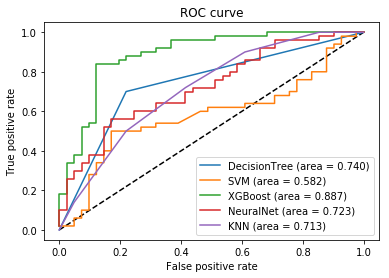

In [19]:
from sklearn.metrics import roc_curve

model_proba = pd.DataFrame()

for modelname, model in models.items():
    model_proba[modelname] = model.predict_proba(X_test)[:,1]

fpr = {}
tpr = {}
thresh = {}
for modelname, _ in models.items():
    fpr[modelname], tpr[modelname], thresh[modelname], = roc_curve(Y_test,model_proba[modelname])

    
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
for modelname, _ in models.items():
    modelauc = metrics.auc(fpr[modelname], tpr[modelname])
    plt.plot(fpr[modelname], tpr[modelname], label=modelname + ' (area = %0.3f)' % modelauc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [20]:
from sklearn.metrics import roc_curve

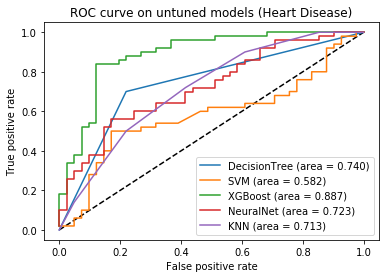

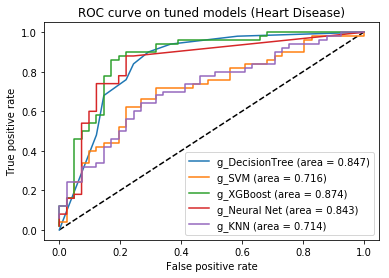

In [21]:
tmodel_proba = {}

for modelname, model in grid_models.items():
    tmodel_proba[modelname] = model.best_estimator_.predict_proba(X_test)[:,1]

t_fpr = {}
t_tpr = {}
t_thresh = {}

for modelname, _ in grid_models.items():
    t_fpr[modelname], t_tpr[modelname], t_thresh[modelname], = roc_curve(Y_test,tmodel_proba[modelname])

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
for modelname, _ in models.items():
    modelauc = metrics.auc(fpr[modelname], tpr[modelname])
    plt.plot(fpr[modelname], tpr[modelname], label=modelname + ' (area = %0.3f)' % modelauc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve on untuned models (Heart Disease)')
plt.legend(loc='best')
    
plt.figure(2)
plt.plot([0, 1], [0, 1], 'k--')
for modelname, _ in grid_models.items():
    modelauc = metrics.auc(t_fpr[modelname], t_tpr[modelname])
    plt.plot(t_fpr[modelname], t_tpr[modelname], label=modelname + ' (area = %0.3f)' % modelauc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve on tuned models (Heart Disease)')
plt.legend(loc='best')
plt.show()

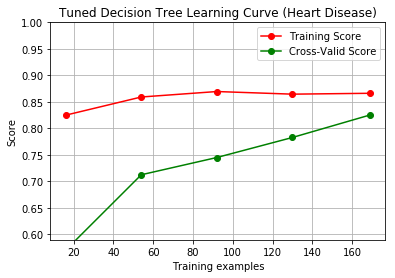

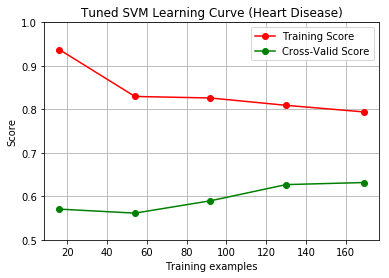

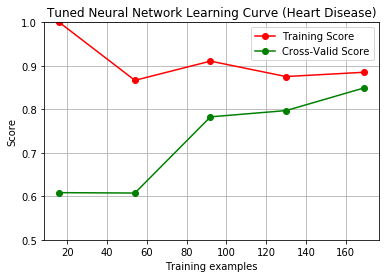

C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\labe

C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\labe

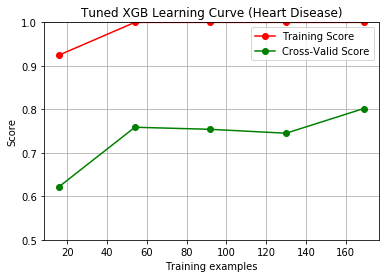

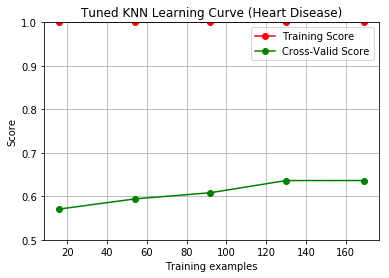

In [22]:
dt_sizes, dt_train_scores, dt_valid_scores = learning_curve(grid_dt.best_estimator_, X_train, Y_train, train_sizes=np.linspace(0.1, 1.0, 5.0, 10.0), cv=folds)
plot_learning_curves('Tuned Decision Tree Learning Curve (Heart Disease)', dt_sizes, dt_train_scores, dt_valid_scores, (.59, 1.0))

svm_sizes, svm_train_scores, svm_valid_scores = learning_curve(grid_svm.best_estimator_, X_train, Y_train, train_sizes=np.linspace(0.1, 1.0, 5.0, 10.0), cv=folds)
plot_learning_curves('Tuned SVM Learning Curve (Heart Disease)', svm_sizes, svm_train_scores, svm_valid_scores, (.5, 1.0))

nn_sizes, nn_train_scores, nn_valid_scores = learning_curve(grid_nn.best_estimator_, X_train, Y_train, train_sizes=np.linspace(0.1,1.0,5.0,10.0), cv=folds)
plot_learning_curves('Tuned Neural Network Learning Curve (Heart Disease)', nn_sizes, nn_train_scores, nn_valid_scores, (.5, 1.0))

xgb_sizes, xgb_train_scores, xgb_valid_scores = learning_curve(grid_xgb.best_estimator_, X_train, Y_train, train_sizes=np.linspace(0.1,1.0,5.0,10.0), cv=folds)
plot_learning_curves('Tuned XGB Learning Curve (Heart Disease)', xgb_sizes, xgb_train_scores, xgb_valid_scores, (.5, 1.0))

knn_sizes, knn_train_scores, knn_valid_scores = learning_curve(grid_knn.best_estimator_, X_train, Y_train, train_sizes=np.linspace(0.1,1.0,5.0,10.0), cv=folds)
plot_learning_curves('Tuned KNN Learning Curve (Heart Disease)', knn_sizes, knn_train_scores, knn_valid_scores, (.5, 1.0))
